In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
print("All imports were successful!")

All imports were successful!


In [83]:
# Load dataset
data = pd.read_csv('event_data.csv')

In [84]:

# Preprocessing
numerical_features = ['Previous_Attendance_ETE1', 'Previous_Attendance_ETE2', 'Marketing_Effort', 'Guest_Speakers']
categorical_features = ['Event_Date', 'Weather_Forecast', 'Time_of_Day']

In [85]:
# Define preprocessing for numerical data
numerical_transformer = StandardScaler()
            
# Define preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first')

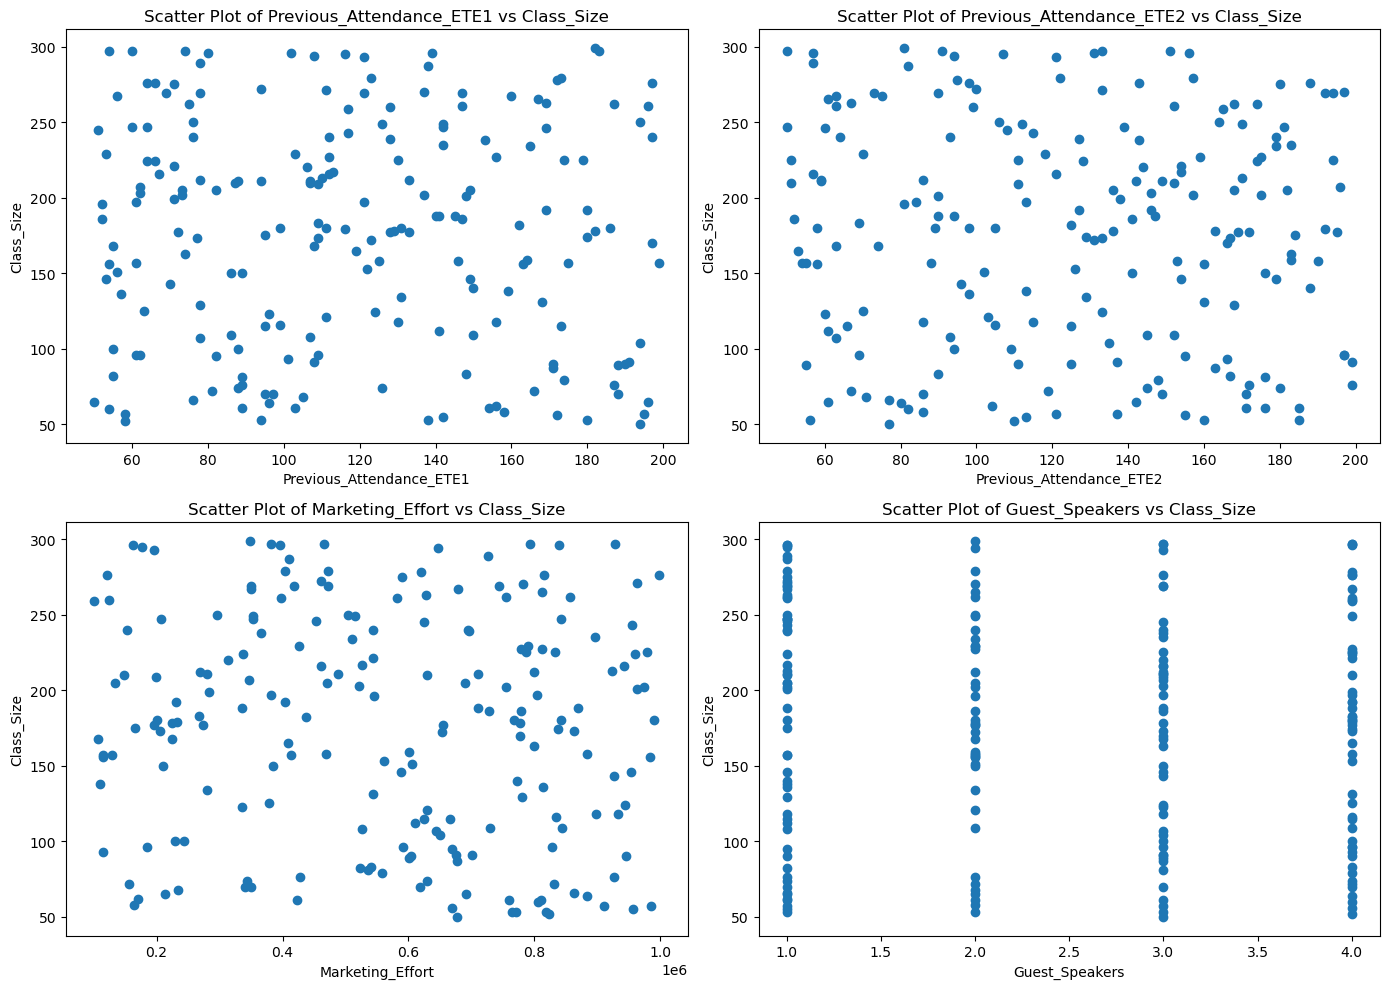

In [86]:
# Scatterplots for relationship between features and Class_Size
plt.figure(figsize=(14, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(data[feature], data['Class_Size'])
    plt.xlabel(feature)
    plt.ylabel('Class_Size')
    plt.title(f'Scatter Plot of {feature} vs Class_Size')

plt.tight_layout()
plt.show()

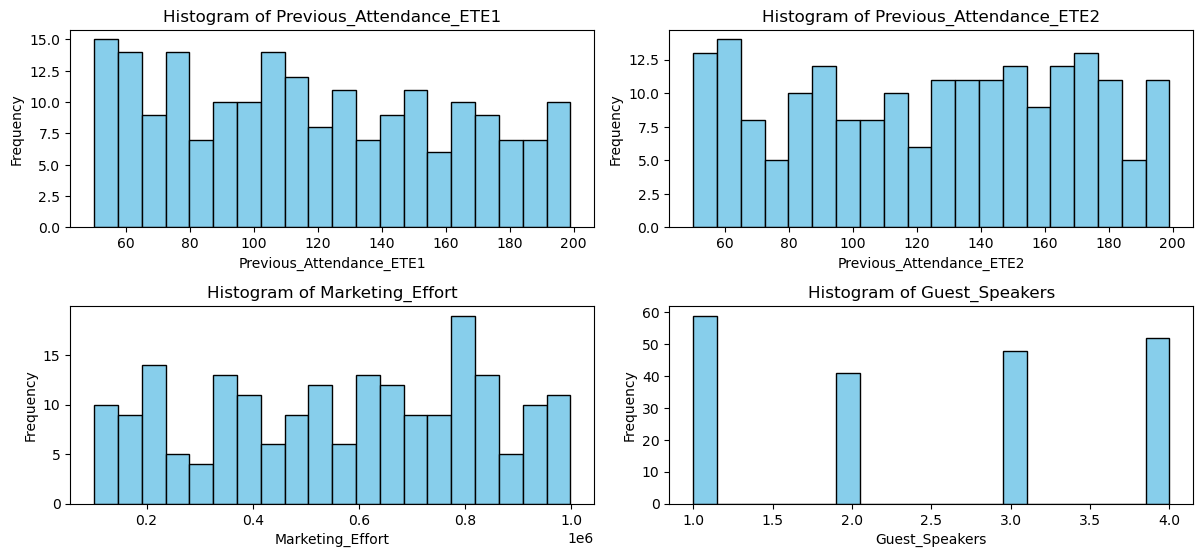

In [87]:
# Histograms for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [88]:
# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [89]:

# Create a pipeline that includes the preprocessor and the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [90]:
# Split the data
X = data.drop('Class_Size', axis=1)
y = data['Class_Size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Previous_Attendance_ETE1',
                                                   'Previous_Attendance_ETE2',
                                                   'Marketing_Effort',
                                                   'Guest_Speakers']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Event_Date',
                                                   'Weather_Forecast',
                                                   'Time_of_Day'])])),
                ('regressor', LinearRegression())])

In [92]:
# Predict and evaluate
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 55.56719805228041
MSE: 4394.086212257514
R2 Score: -0.06128439998273416


In [95]:
# Save the model
joblib_file = 'model.joblib'
joblib.dump(model, joblib_file)

['model.joblib']